In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import datetime as dt

In [2]:
data=pd.read_csv("D:/Downloads/grad.csv")

In [3]:
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [5]:
data['GreScoresFrequency']=['Above300' if each > 300 else 'Below300' for each in data['GRE Score']]

In [6]:
data.columns=['Serial No.','GRE Score','TOEFL Score','University Rating','SOP','LOR','CGPA','Research','Admit','GreScoresFrequency']

In [146]:
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Admit,GreScoresFrequency
0,1,337,118,4,4.5,4.5,9.65,1,0.92,Above300
1,2,324,107,4,4.0,4.5,8.87,1,0.76,Above300
2,3,316,104,3,3.0,3.5,8.00,1,0.72,Above300
3,4,322,110,3,3.5,2.5,8.67,1,0.80,Above300
4,5,314,103,2,2.0,3.0,8.21,0,0.65,Above300


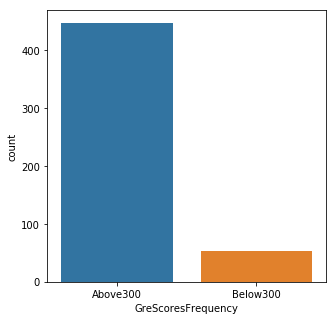

In [93]:
fig, ax = plt.subplots(figsize=(5,5))
sns.countplot(x="GreScoresFrequency", data=data)

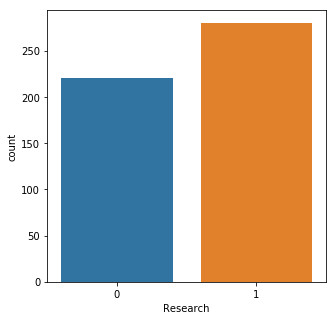

In [95]:
fig, ax = plt.subplots(figsize=(5,5))
sns.countplot(x="Research", data=data)

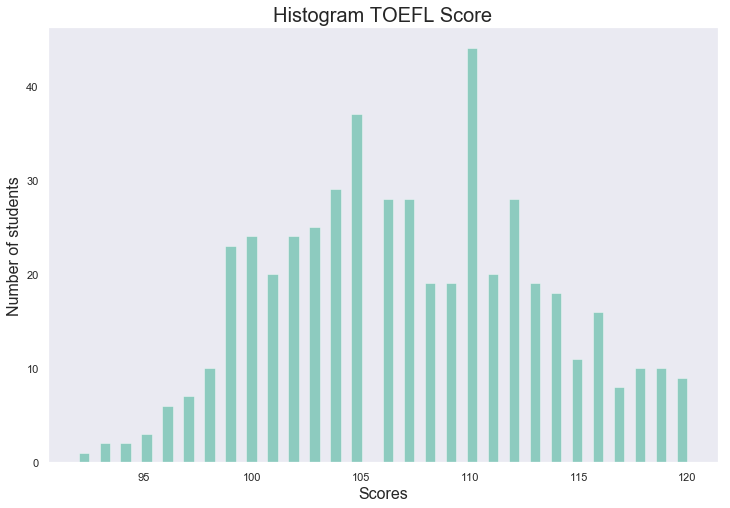

In [7]:
sns.set(style ="dark", palette="colorblind", color_codes=True)
x = data['TOEFL Score']
plt.figure(figsize=(12,8))
ax = sns.distplot(x, bins = 58, kde = False, color='g')
ax.set_xlabel(xlabel="Scores", fontsize=16)
ax.set_ylabel(ylabel='Number of students', fontsize=16)
ax.set_title(label='Histogram TOEFL Score', fontsize=20)
plt.show()

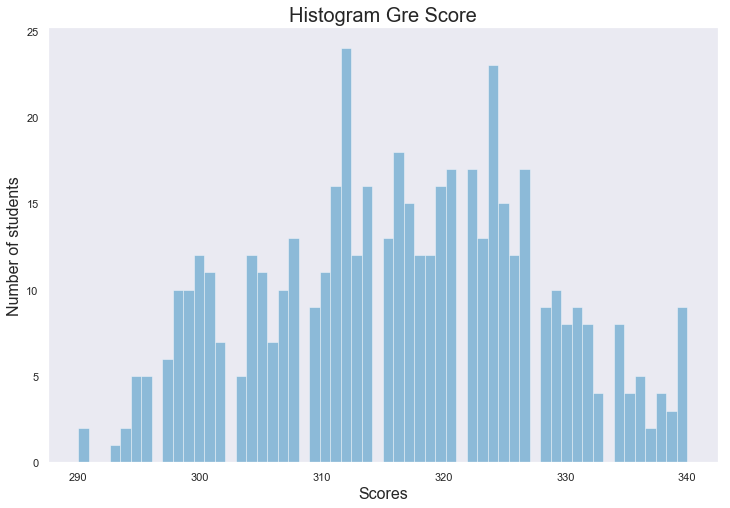

In [8]:
sns.set(style ="dark", palette="colorblind", color_codes=True)
x = data['GRE Score']
plt.figure(figsize=(12,8))
ax = sns.distplot(x, bins = 58, kde = False, color='b')
ax.set_xlabel(xlabel="Scores", fontsize=16)
ax.set_ylabel(ylabel='Number of students', fontsize=16)
ax.set_title(label='Histogram Gre Score', fontsize=20)
plt.show()

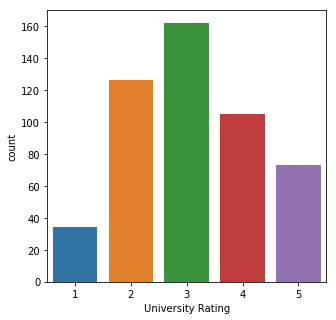

In [102]:
fig, ax = plt.subplots(figsize=(5,5))
sns.countplot(x="University Rating", data=data)

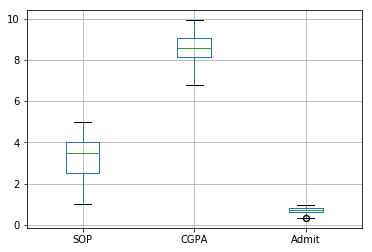

In [109]:
list=['SOP','CGPA','Admit']
data[list].boxplot()

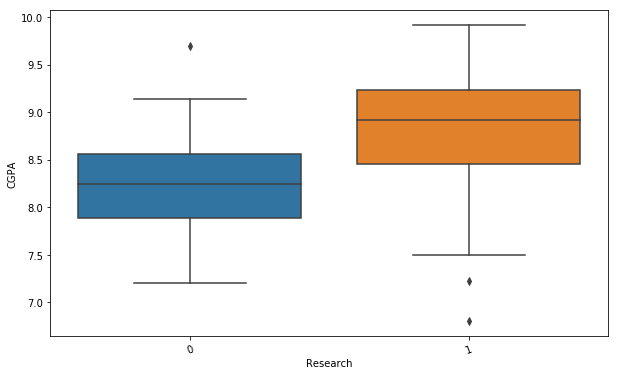

In [111]:
plt.figure(figsize=(10,6))
g = sns.boxplot(y='CGPA', x='Research', data = data)
g.set_xticklabels(g.get_xticklabels(),rotation=20);

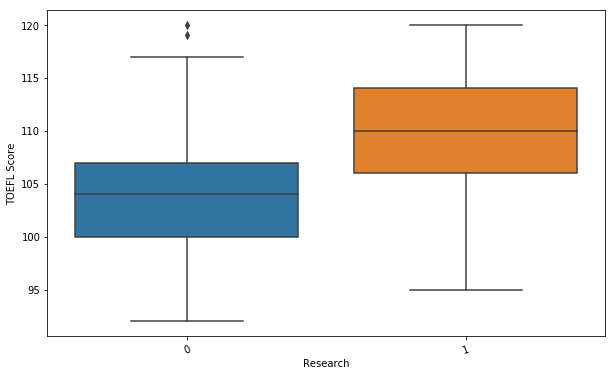

In [113]:
plt.figure(figsize=(10,6))
g = sns.boxplot(y='TOEFL Score', x='Research', data = data)
g.set_xticklabels(g.get_xticklabels(),rotation=20);

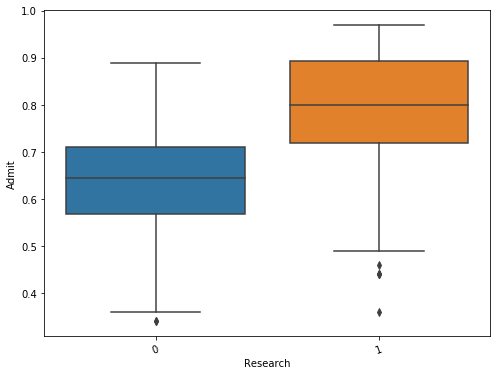

In [114]:
plt.figure(figsize=(8,6))
g = sns.boxplot(y='Admit', x='Research', data = data)
g.set_xticklabels(g.get_xticklabels(),rotation=20);

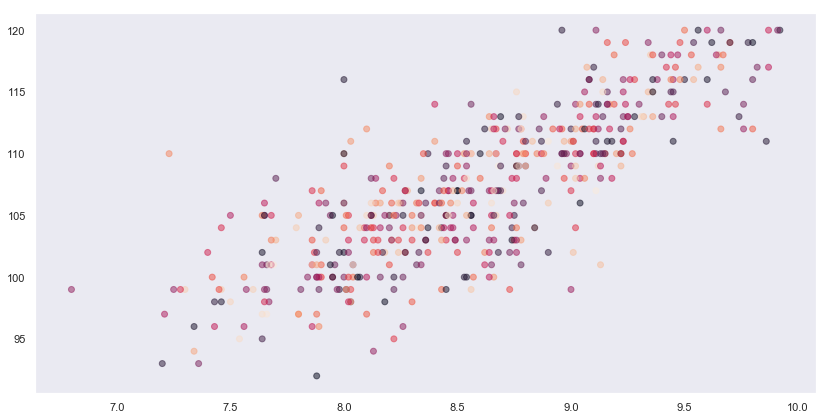

In [154]:
plt.figure(figsize=(14,7))
cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
N=500
colors = np.random.rand(N)
ax=plt.scatter(data.CGPA, data['TOEFL Score'],c=colors, alpha=0.5)

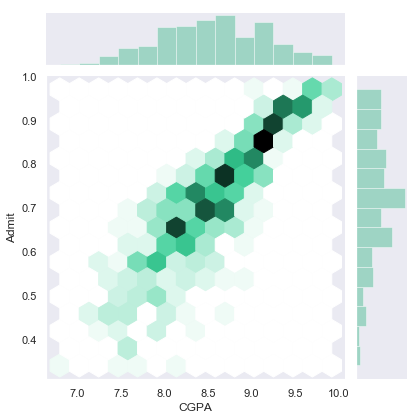

In [149]:
sns.jointplot(x=data['CGPA'], y=data['Admit'], kind="hex", color="#2CB380")

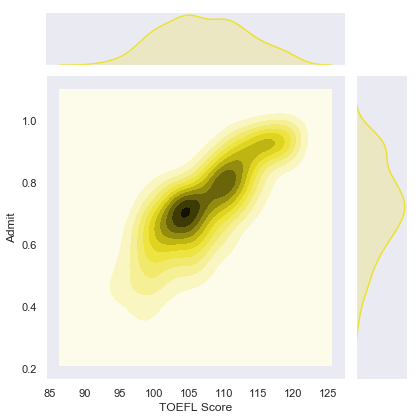

In [150]:
sns.jointplot(x=data['TOEFL Score'], y=data['Admit'], kind="kde", color="y")

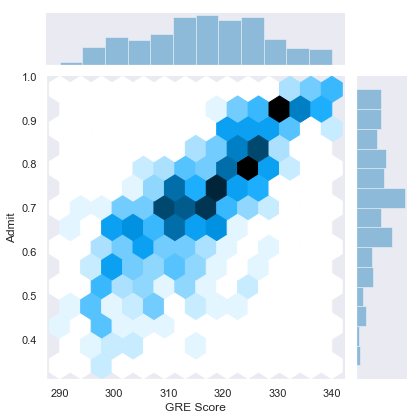

In [151]:
sns.jointplot(x=data['GRE Score'], y=data['Admit'], kind="hex", color="b")

In [66]:
X = data.iloc[:, 1:7].values
y = data.iloc[:, 8].values

In [67]:
y = [1 if each > 0.5 else 0 for each in y]

In [68]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
X = sc.fit_transform(X)
#y=sc.transform(y)

In [69]:
from sklearn.model_selection import train_test_split
#split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [94]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(penalty='l2',C=.00001,intercept_scaling=1)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
accuracy

D:\Anancona\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.94

In [71]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(X)
df = pd.DataFrame(data = principalComponents, columns = ['1','2','3'])

In [72]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestClassifier
lr = RandomForestClassifier(n_estimators=15,oob_score=True ,random_state =42, min_samples_split=25)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.92

In [73]:
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier(random_state=1)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.88

In [74]:
from sklearn.ensemble import GradientBoostingClassifier
model= GradientBoostingClassifier(learning_rate=0.01,random_state=1)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
accuracy


0.95

In [110]:
import xgboost as xgb
model=xgb.XGBClassifier(random_state=1,learning_rate=0.01)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.93